# torchkeras工具函数演示

除了以优雅的方式训练pytorch模型，torchkeras 还为算法工程师提供了一些非常实用的工具函数。

这些工具函数的使用非常简单，通常只要一行代码就可解决算法工程师常常遇到的一些技术需求，这里稍作演示。

例如：


* 1，根据关键词抓取百度图片 🔥🔥🔥

* 2，根据url下载github文件

* 3，根据url获取图片

* 4，matplotlib支持中文和负号显示 🔥

* 5，matplotlib图像转换成PIL图像

* 6，文本转PIL图像

* 7，发送邮件

* 8，探索性数据分析(EDA) 🔥🔥

* 9，合并数据集文件夹

* 10，以彩色形式print

* 11，格式化打印dataframe

* 12，打印带时间分割线的日志 🔥

* 13，图片分析和重复图片清洗工具 🔥🔥🔥



In [ ]:
!pip install -U torchkeras 

In [1]:
import sys 
sys.path.append("..")

## 1，根据关键词抓取百度图片

In [ ]:
from  torchkeras.data import download_baidu_pictures 
download_baidu_pictures(keyword='猫咪', needed_pics_num=100, save_dir='cats')

## 2， 根据url下载github文件

In [ ]:
from torchkeras.data import download_github_file 
download_github_file('https://github.com/lyhue1991/YOLOv8_tools/blob/main/wandb_callback.py')


## 3，根据url获取图片

In [ ]:
from torchkeras.data import download_image 
img = download_image('https://pic1.zhimg.com/v2-10423b9e7bfccf690d7a0d16189029dd_1440w.jpg?source=d16d100b')
img 

## 4， matplotlib支持中文和负号显示

In [ ]:
%matplotlib inline 
import numpy as np 
from torchkeras import plots 
plots.set_matplotlib_font(font_size=12) 
import matplotlib.pyplot as plt 

x = np.linspace(-2*np.pi,2*np.pi,1000)
y = np.sin(x)
plt.plot(x,y)
plt.title('正弦曲线')


## 5， matplotlib图像转换成PIL图像

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)
plt.plot(x,y)
fig = plt.gcf()

In [ ]:
from torchkeras.plots import fig2img 
img = fig2img(fig)
img 

## 6，  文本转PIL图像

In [ ]:
from torchkeras.utils import text_to_image
text_to_image('hello world\n你好中国！\n你好北京!')


## 7，发送邮件

In [ ]:
from torchkeras.email import send_msg 
send_msg(receivers =['745554619@qq.com'],
         subject='hello', msg='hello world')


## 8，探索性数据分析(EDA)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 
from torchkeras.eda import pipeline 


breast = datasets.load_breast_cancer()
df = pd.DataFrame(breast.data,columns = breast.feature_names)
df["label"] = breast.target
dftrain,dftest = train_test_split(df,test_size = 0.3)
dfeda = pipeline(dftrain,dftest)
dfeda 

## 9，合并数据集文件夹

图像任务相关的数据集通常会整理成文件夹形式，例如yolo格式。有时候我们会以增量的形式不断地新做一些数据。

有没有什么办法可以快速地把新的数据集文件夹和老的数据集文件夹方便的合并呢？

In [ ]:
from pathlib import Path 
for folder in ['ds1','ds2']:
    for  tp in ['images','labels']:
        for part in ['train','val']:
            path = Path(folder)/tp/part
            path.mkdir(parents=True, exist_ok=True)
            for i in range(3):
                if tp=='images':
                    (path/f'{i}.jpeg').touch()
                else:
                    (path/f'{i}.txt').touch()

In [ ]:
from torchkeras.data import merge_dataset_folders 
from_folders = ['ds1','ds2']
to_folder = 'ds_merge'
merge_dataset_folders(from_folders,to_folder)


## 10，以彩色形式print 

In [ ]:
from torchkeras.utils import colorful 
print(colorful('helloworld'))
print(colorful('helloworld',color='blue'))
print(colorful('helloworld',color='blue'))

## 11，格式化打印dataframe

In [ ]:
from sklearn.datasets import load_diabetes
ds = load_diabetes(as_frame=True)
df = ds['data'].copy()
df['target'] = ds['target']
df['text'] = 'hello\t 你好中国\n 你好 北京'

from torchkeras.utils import prettydf 
prettydf(df,nrows=10,ncols=10);



## 12，打印带时间分割线的日志

In [ ]:
from torchkeras.utils import printlog 
printlog('step1: reading data...')


## 13，图片分析和重复图片清洗工具

In [ ]:
!pip install fastdup 

In [ ]:
from  torchkeras.data import download_baidu_pictures 
download_baidu_pictures(keyword='猫咪', needed_pics_num=500, save_dir='cats')


In [2]:
from torchkeras.data import ImageCleaner
cleaner = ImageCleaner(img_files = 'cats')
cleaner.run_summary(duplicate_similirity=0.99, outlier_percentile=0.02)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
Resetting model width
2023-06-09 22:47:51 [INFO] Going to loop over dir cats
2023-06-09 22:47:51 [INFO] Found total 1100 images to run on, 1100 train, 0 test, name list 1100, counter 1100 
2023-06-09 22:47:52 [ERROR] Failed to read image cats/20230609_121611_893690.jpg
2023-06-09 22:47:53 [ERROR] Failed to read image cats/20230609_121637_756421.jpg
2023-06-09 22:47:54 [ERROR] Failed to read image cats/20230609_122249_584583.jpg
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■         ] 82% Estimated: 0 Minutes
 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 1100 images
    Valid images are 99.64% (1,096) of the data, invalid are 0.36% (4) of the data
    For a detailed analysis, use `.invalid_instances()`.

    Similarity:  49.55% (545) belong to 3 similarity clusters (components).
    50.45% (555) images do not belong to any s

['Dataset contains 1100 images',
 'Valid images are 99.64% (1,096) of the data, invalid are 0.36% (4) of the data',
 'For a detailed analysis, use `.invalid_instances()`.\n',
 'Similarity:  49.55% (545) belong to 3 similarity clusters (components).',
 '50.45% (555) images do not belong to any similarity cluster.',
 'Largest cluster has 16 (1.45%) images.',
 'For a detailed analysis, use `.connected_components()`\n(similarity threshold used is 0.9, connected component threshold used is 0.99).\n',
 'Outliers: 4.91% (54) of images are possible outliers, and fall in the bottom 2.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.']

In [3]:
dfduplicates = cleaner.get_duplicates() 
dfduplicates 

,component_id,files,mean_distance,len
0,0,"[cats/20230609_121511_482624.jpg, cats/20230609_122159_548108.jpg, cats/20230609_224511_681507.jpg]",1.0,3
1,1,"[cats/20230609_121511_683499.jpg, cats/20230609_122159_690295.jpg, cats/20230609_224511_746840.jpg]",1.0,3
2,2,"[cats/20230609_121511_952414.jpg, cats/20230609_122159_843992.jpg, cats/20230609_224511_837174.jpg]",1.0,3
3,3,"[cats/20230609_121512_261976.jpg, cats/20230609_122200_058430.jpg, cats/20230609_224511_959702.jpg]",1.0,3
4,4,"[cats/20230609_121512_433926.jpg, cats/20230609_122200_216747.jpg, cats/20230609_224512_052387.jpg]",1.0,3
...,...,...,...,...
489,492,"[cats/20230609_121707_379358.jpg, cats/20230609_122327_004534.jpg]",1.0,2
490,493,"[cats/20230609_121707_541652.jpg, cats/20230609_122327_203626.jpg]",1.0,2
491,494,"[cats/20230609_121707_677783.jpg, cats/20230609_122327_427468.jpg]",1.0,2
492,495,"[cats/20230609_121707_810113.jpg, cats/20230609_122327_599207.jpg]",1.0,2


In [4]:
dfstats = cleaner.get_stats()
dfstats

,index,img_w,img_h,unique,blur,mean,min,max,stdv,file_size,contrast,filename,error_code,is_valid,fd_index
0,0,500,500,256,397.8018,211.9080,0.0,255.0,27.0441,23695,1.0000,cats/20230609_121511_482624.jpg,VALID,True,0
1,1,500,666,256,909.3474,133.6337,0.0,255.0,60.2825,36042,1.0000,cats/20230609_121511_683499.jpg,VALID,True,1
2,2,500,538,256,2792.6145,137.1873,0.0,255.0,51.0624,41847,1.0000,cats/20230609_121511_952414.jpg,VALID,True,2
3,3,500,666,256,7095.8438,126.6451,0.0,255.0,54.4063,70310,1.0000,cats/20230609_121512_261976.jpg,VALID,True,3
4,4,500,666,234,446.1606,145.6845,0.0,255.0,56.5701,28873,1.0000,cats/20230609_121512_433926.jpg,VALID,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1095,500,889,236,735.9399,155.2243,17.0,255.0,51.7418,40983,0.8750,cats/20230609_224523_658451.jpg,VALID,True,1095
1092,1096,500,677,256,308.3701,112.1669,0.0,255.0,86.4620,19738,1.0000,cats/20230609_224523_780328.jpg,VALID,True,1096
1093,1097,500,888,224,654.4833,135.5277,1.0,255.0,39.5759,44819,0.9922,cats/20230609_224523_868985.jpg,VALID,True,1097
1094,1098,500,667,256,2335.5481,127.8180,0.0,255.0,56.8278,37910,1.0000,cats/20230609_224523_981697.jpg,VALID,True,1098


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 117.34it/s]


Stored similarity visual view in  ImageCleaner/galleries/duplicates.html



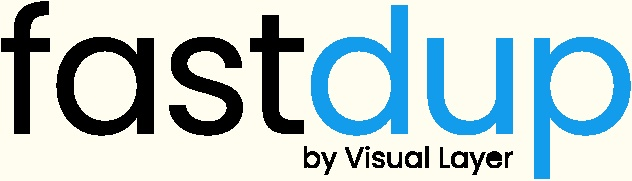
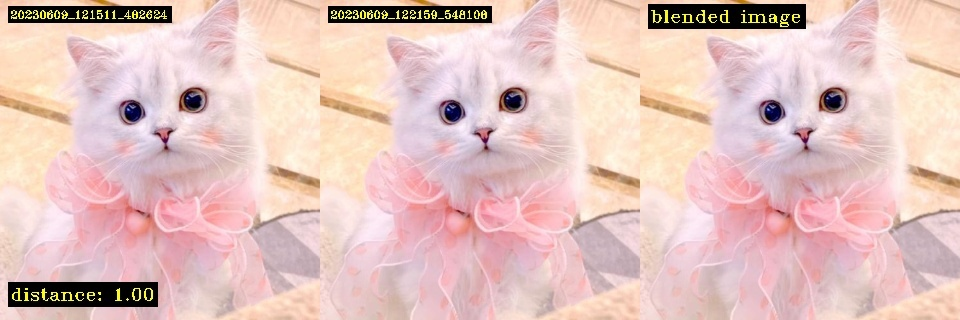
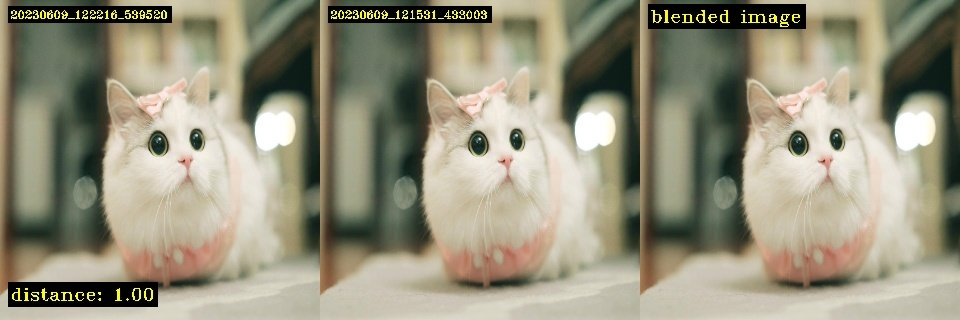
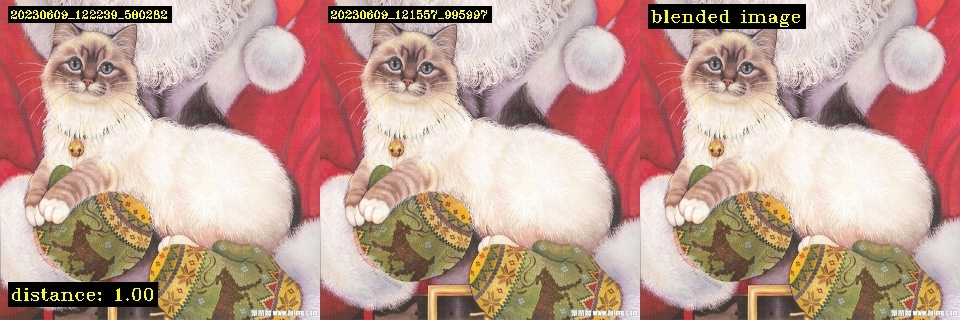
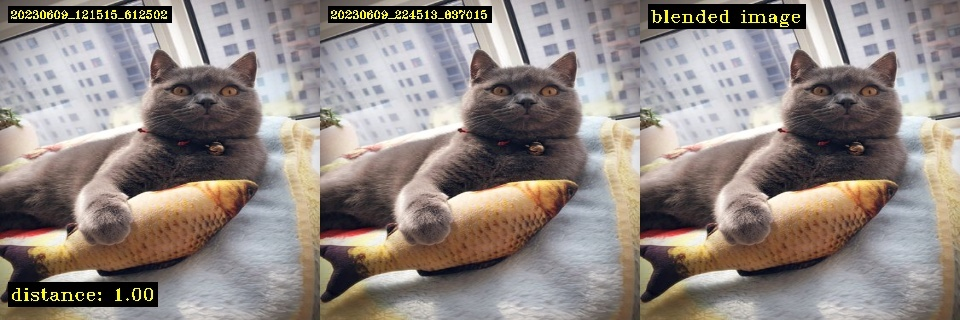
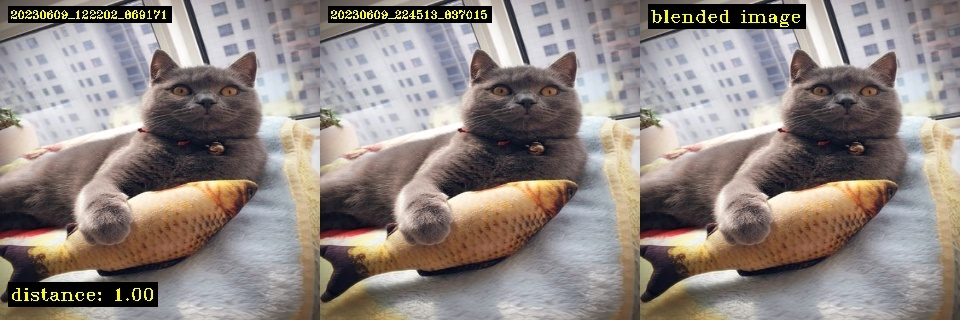
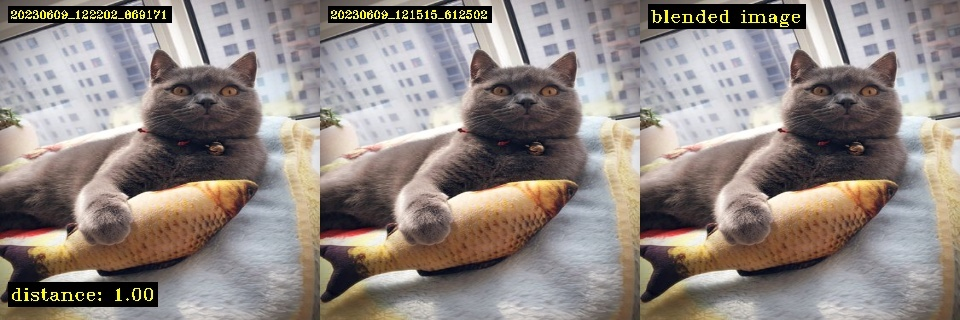
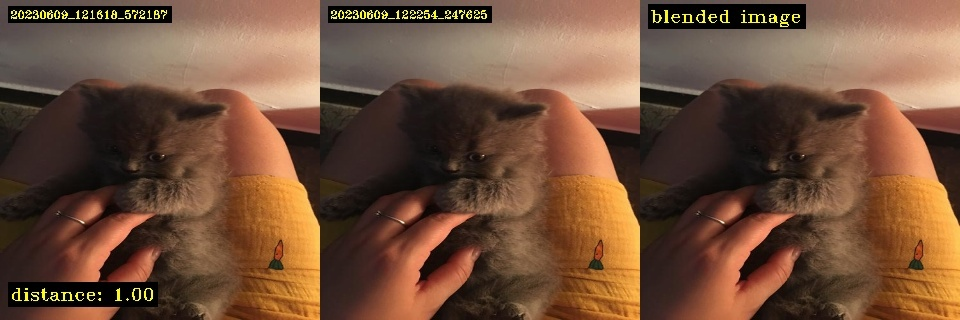
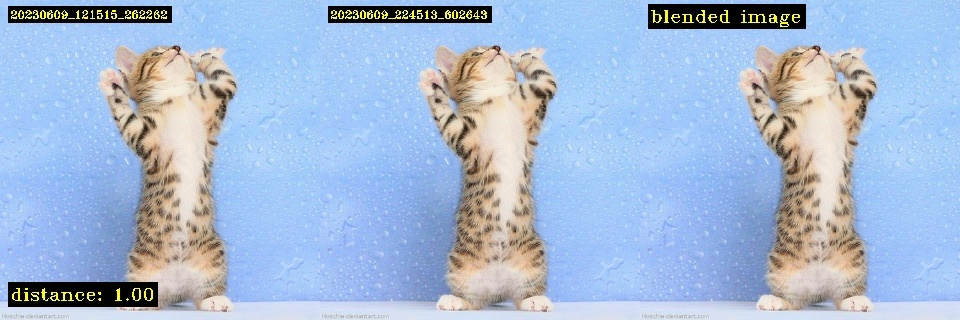
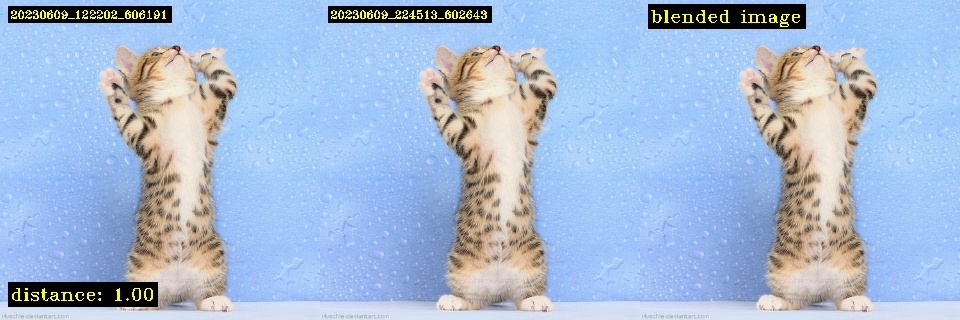
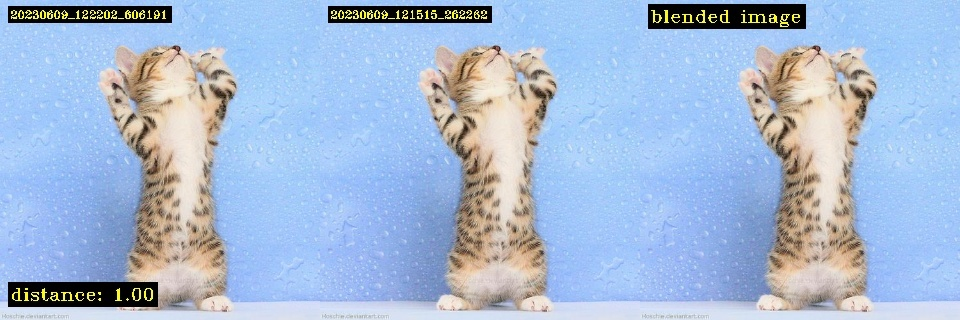
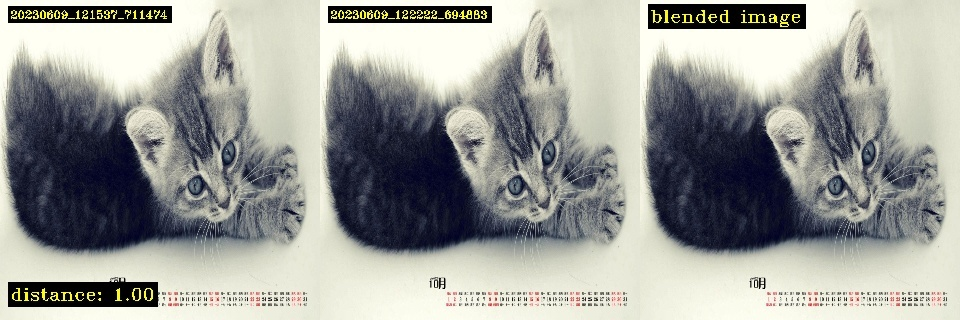
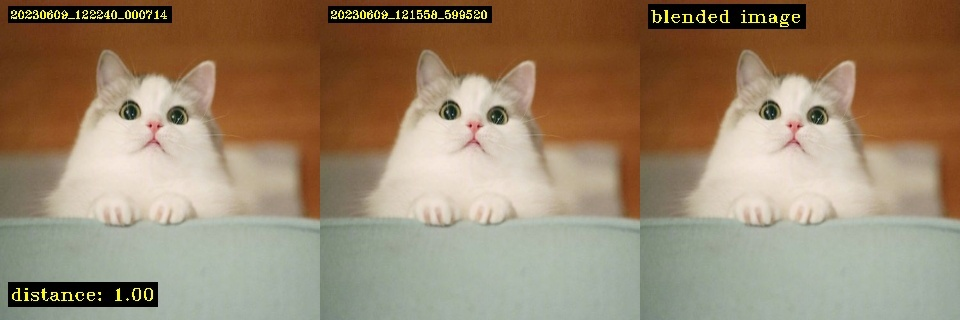
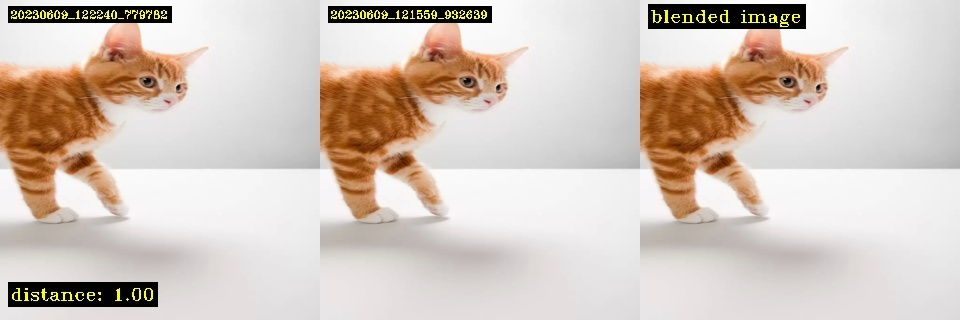
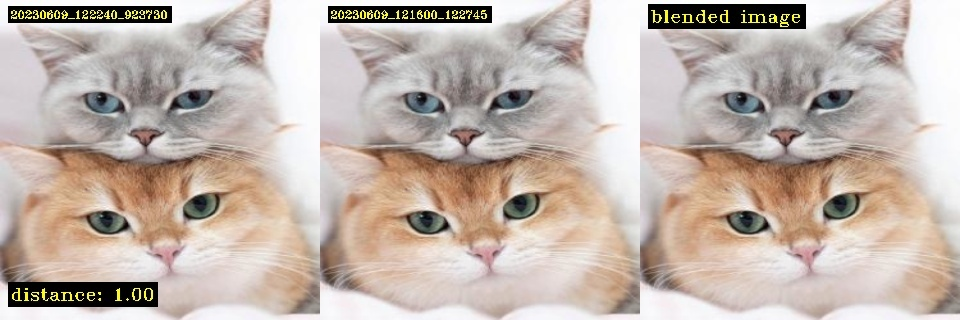
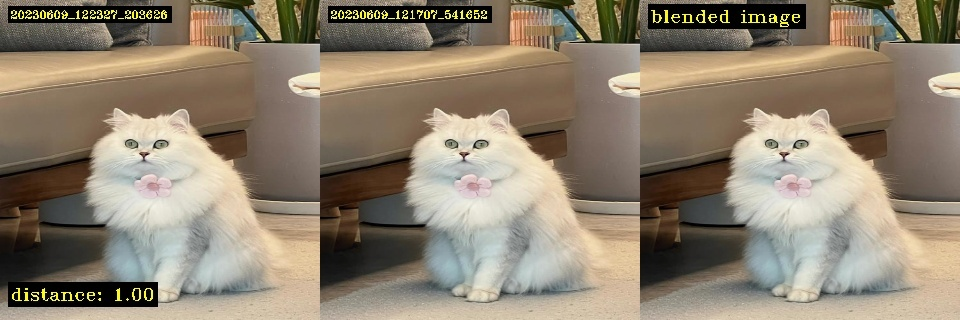
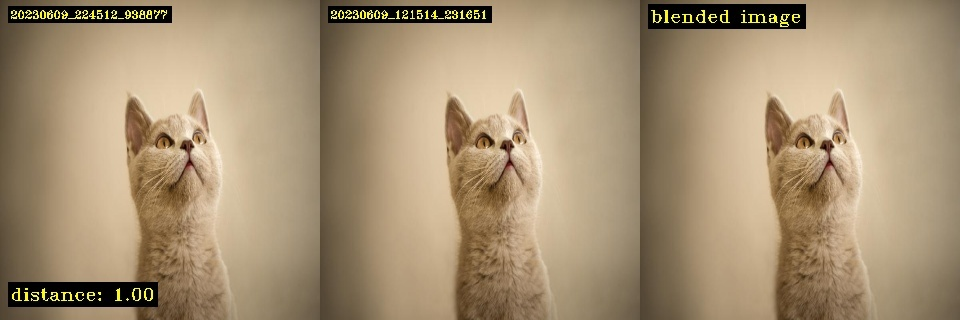
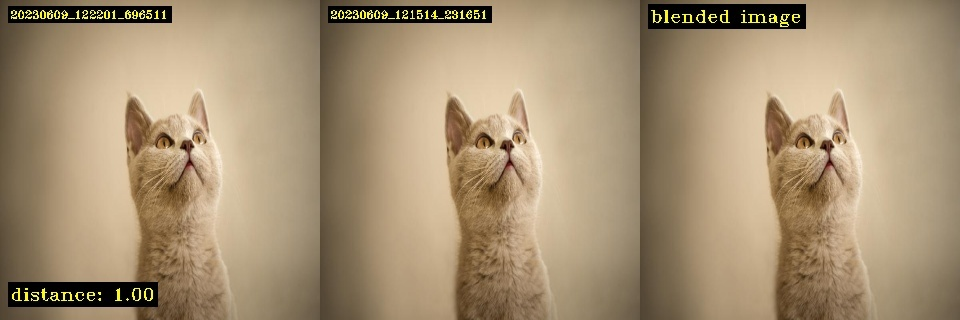
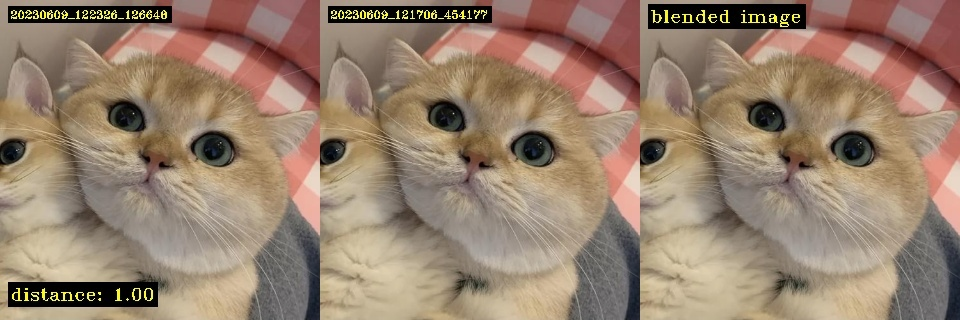

In [5]:
cleaner.vis_duplicates() 

In [ ]:
cleaner.delete_duplicates() 